In [1]:
import desitarget 
from desitarget.targets import desi_mask, bgs_mask, mws_mask

from astropy.table import Table
from astropy.io import fits
from astropy.cosmology import FlatLambdaCDM
import astropy.units as U

import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [2]:
! ls /global/cfs/cdirs/desi/survey/catalogs/edav1/da02/LSScats/clustering/BGS*.dat.fits

/global/cfs/cdirs/desi/survey/catalogs/edav1/da02/LSScats/clustering/BGS_BRIGHT-21.5_N_clustering.dat.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/da02/LSScats/clustering/BGS_BRIGHT-21.5_S_clustering.dat.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/da02/LSScats/clustering/BGS_BRIGHT_N_clustering.dat.fits
/global/cfs/cdirs/desi/survey/catalogs/edav1/da02/LSScats/clustering/BGS_BRIGHT_S_clustering.dat.fits


In [3]:
N_raw = Table.read('/global/cfs/cdirs/desi/survey/catalogs/edav1/da02/LSScats/clustering/BGS_BRIGHT_N_clustering.dat.fits')

In [4]:
N_raw

TARGETID,Z,NTILE,TILES,RA,DEC,WEIGHT,WEIGHT_ZFAIL,WEIGHT_COMP,WEIGHT_SYS,flux_g_dered,flux_r_dered,flux_z_dered,flux_w1_dered,flux_w2_dered,NZ,WEIGHT_FKP
int64,float64,int64,bytes11,float64,float64,float64,float32,float64,float64,float32,float32,float32,float32,float32,float64,float64
39633366047264069,0.23373774756268273,1,20001,268.6773406567538,58.196956322063585,5.642263351520067,1.0164545,5.0,1.1101851747117222,5.1988206,18.016794,36.307766,35.975773,23.484913,0.008160549346013691,0.036596235131862095
39633366047264412,0.2262081883049673,1,20001,268.7121644210125,58.17137871856034,7.864241155855226,1.01196,7.0,1.1101851747117222,5.6451545,17.743734,36.715954,42.338474,30.138641,0.008160549346013691,0.036596235131862095
39633366047264487,0.10750217420934505,1,20001,268.72025843577376,58.150995263304566,2.246647062564488,1.0118344,2.0,1.1101851747117222,65.581665,164.53503,310.0892,251.75818,156.65999,0.026208493705373998,0.011689576566903793
39633366047264710,0.20509598282456507,1,20001,268.7447179685751,58.35164090788789,3.1701678101969413,1.0193987,3.0,1.0366136571704718,9.199382,18.115196,31.323214,38.144897,31.80481,0.011294562687062876,0.026712778718567892
39633366047264297,0.16095951646742163,1,20001,268.7008850398322,58.31651750837625,2.1158721997182197,1.0205693,2.0,1.0366136571704718,7.7169294,16.809292,28.698618,21.945616,12.552565,0.017605465587063433,0.01730292847324051
39633366047265345,0.23282678015147948,1,20001,268.81269831707334,58.142903267925234,1.123869848907434,1.0123265,1.0,1.1101851747117222,5.7025113,20.790937,44.397903,52.077763,37.31693,0.008160549346013691,0.036596235131862095
39633366047265059,0.18293134246555096,1,20001,268.78466388262035,58.36109277746728,1.0559409979905976,1.0186447,1.0,1.0366136571704718,16.68374,31.437498,50.411964,43.284397,33.23363,0.013696817349039502,0.022131370812600925
39633366051456481,0.2921522504545623,1,20001,268.9829065999235,58.3056335434302,2.0610373527184795,1.0173928,2.0,1.0129015286827314,12.465097,30.888058,55.453087,60.664528,37.495365,0.004582895074726721,0.06335522887692997
39633366047265062,0.22913931839469825,1,20001,268.78498910544477,58.22941912184547,2.247230965995287,1.0120974,2.0,1.1101851747117222,9.368853,30.154222,56.5326,57.30369,32.62352,0.008160549346013691,0.036596235131862095


In [5]:
S_raw = Table.read('/global/cfs/cdirs/desi/survey/catalogs/edav1/da02/LSScats/clustering/BGS_BRIGHT_S_clustering.dat.fits')

In [6]:
data_raw = Table(np.hstack((N_raw,S_raw))) #BGS ANY in N, S combined

In [7]:
N = Table.read('/global/cfs/cdirs/desi/survey/catalogs/DA02/LSS/guadalupe/LSScats/test/BGS_BRIGHT_N_clustering.dat.fits')
S = Table.read('/global/cfs/cdirs/desi/survey/catalogs/DA02/LSS/guadalupe/LSScats/test/BGS_BRIGHT_S_clustering.dat.fits')
N['APPLIM'] = 19.539993
S['APPLIM'] = 19.5

In [8]:
N0 = Table.read('/global/cfs/cdirs/desi/survey/catalogs/DA02/LSS/guadalupe/LSScats/test/BGS_BRIGHT_N_0_clustering.ran.fits')
N4 = Table.read('/global/cfs/cdirs/desi/survey/catalogs/DA02/LSS/guadalupe/LSScats/test/BGS_BRIGHT_N_4_clustering.ran.fits')

In [9]:
data = Table(np.hstack((N, S)))
data['ZLIM_UPPER'] = 0.6
data

TARGETID,Z,NTILE,TILES,RA,DEC,WEIGHT,WEIGHT_ZFAIL,WEIGHT_COMP,WEIGHT_SYS,flux_g_dered,flux_r_dered,flux_z_dered,flux_w1_dered,flux_w2_dered,NZ,WEIGHT_FKP,REST_GMR_0P1,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,EQ_ALL_0P0,EQ_ALL_0P1,ABSMAG_RP1,ABSMAG_RP0,APPLIM,ZLIM_UPPER
int64,float64,int64,bytes11,float64,float64,float64,float32,float64,float64,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
39633366047264297,0.16095951646742163,1,20001,268.7008850398322,58.31651750837625,2.368794267525197,1.0202607,2.0,1.1608769635685512,7.7169294,16.809292,28.698618,21.945616,12.552565,0.01856145426373512,0.016762400045732102,0.721548822097457,-0.0480892836645471,0.07562442170381622,0.17676402087349832,0.38471493423821956,0.637311614101099,-0.15613073097339897,-0.15613073097339897,-19.01505339080518,-19.239906695343226,19.539993,0.6
39633366047264412,0.2262081883049673,1,20001,268.7121644210125,58.17137871856034,7.885935437241774,1.0119702,7.0,1.1132365826456456,5.6451545,17.743734,36.715954,42.338474,30.138641,0.008661962234134126,0.03524444880947024,0.8916872718248806,0.055141909042679765,0.4068761917832286,0.28235492619244257,0.7782674152354703,0.7475090655224019,-0.21942194265581827,-0.21942194265581827,-19.934640009395764,-20.16185302654553,19.539993,0.6
39633366047264710,0.20509598282456507,1,20001,268.7447179685751,58.35164090788789,3.5493453409436366,1.0191563,3.0,1.1608769635685512,9.199382,18.115196,31.323214,38.144897,31.80481,0.011911149469520776,0.025879084952906813,0.5397214238839109,-0.06256931584764004,0.13341940431141774,0.14342391928728798,0.37673369579311694,0.5024003675371398,-0.19894310333982812,-0.19894310333982812,-19.621429255164735,-19.82742249029966,19.539993,0.6
39633378638561503,0.3053206447975358,1,20001,270.5073482253405,59.33896919077583,2.3158908743540527,1.0118785,2.0,1.1443522597899662,5.816003,24.00663,49.666294,60.648766,39.263374,0.0032132398416806277,0.08965087986982612,0.948196974030458,0.1920467162085221,0.783116328481775,0.4201382412002311,1.1720507422145277,0.7873540852894143,-0.2961610254536097,-0.2961610254536097,-21.06440409622748,-21.29249562121919,19.539993,0.6
39633372376467396,0.2775320962351793,1,20001,268.5121713053863,58.81550252397294,3.2715555825991145,1.0216688,3.0,1.067389487000734,4.9087415,18.647816,47.224636,121.78173,128.69661,0.006279602345083299,0.047974048180681544,0.9314978452803849,0.14147467853484277,0.6591231040064112,0.36796505192895507,1.0449898286507322,0.7721214940301759,-0.26920613334812393,-0.26920613334812393,-20.528724008118733,-20.755214381512847,19.539993,0.6
39633366047264487,0.10750217420934505,1,20001,268.72025843577376,58.150995263304566,3.3792646040688217,1.0118438,3.0,1.1132365826456456,65.581665,164.53503,310.0892,251.75818,156.65999,0.026715267796619462,0.011706208574030397,0.9793147837596916,-0.09317160654032018,-0.07379673881075391,0.1383131834916128,0.320207896877415,0.8167949381034556,-0.10427710898306469,-0.10427710898306469,-20.549183985528458,-20.78066877556039,19.539993,0.6
39633366047264069,0.23373774756268273,1,20001,268.6773406567538,58.196956322063585,5.65722136226266,1.0163556,5.0,1.1132365826456456,5.1988206,18.016794,36.307766,35.975773,23.484913,0.008661962234134126,0.03524444880947024,0.9539436956606155,0.08093321342091594,0.4764215093374489,0.30965139400867076,0.8662922728465651,0.7927911127392542,-0.22672561513580225,-0.22672561513580225,-20.049808198242104,-20.27852637882986,19.539993,0.6
39633366051455429,0.2274295421540546,1,20001,268.86868202000977,58.30892044280674,2.274872090138421,1.0217379,2.0,1.1132365826456456,24.459436,80.40709,158.21242,162.85123,116.77073,0.008661962234134126,0.03524444880947024,0.922871669122532,0.06516651677486968,0.43441482751073607,0.2918134730009922,0.8171449928840472,0.7667884599753434,-0.22060665588943296,-0.22060665588943296,-21.597261119229156,-21.82390807545528,19.539993,0.6
39633366

In [10]:
data.dtype.names

('TARGETID',
 'Z',
 'NTILE',
 'TILES',
 'RA',
 'DEC',
 'WEIGHT',
 'WEIGHT_ZFAIL',
 'WEIGHT_COMP',
 'WEIGHT_SYS',
 'flux_g_dered',
 'flux_r_dered',
 'flux_z_dered',
 'flux_w1_dered',
 'flux_w2_dered',
 'NZ',
 'WEIGHT_FKP',
 'REST_GMR_0P1',
 'KCORR_R0P1',
 'KCORR_G0P1',
 'KCORR_R0P0',
 'KCORR_G0P0',
 'REST_GMR_0P0',
 'EQ_ALL_0P0',
 'EQ_ALL_0P1',
 'ABSMAG_RP1',
 'ABSMAG_RP0',
 'APPLIM',
 'ZLIM_UPPER')

In [11]:
data['z_mag'] = 22.5 - 2.5*np.log10(data['flux_z_dered'])
data['w1_mag'] = 22.5 - 2.5*np.log10(data['flux_w1_dered'])
data['g_mag'] = 22.5 - 2.5*np.log10(data['flux_g_dered'])
data['r_mag'] = 22.5 - 2.5*np.log10(data['flux_r_dered'])

N['z_mag'] = 22.5 - 2.5*np.log10(N['flux_z_dered'])
N['w1_mag'] = 22.5 - 2.5*np.log10(N['flux_w1_dered'])
N['g_mag'] = 22.5 - 2.5*np.log10(N['flux_g_dered'])
N['r_mag'] = 22.5 - 2.5*np.log10(N['flux_r_dered'])

S['z_mag'] = 22.5 - 2.5*np.log10(S['flux_z_dered'])
S['w1_mag'] = 22.5 - 2.5*np.log10(S['flux_w1_dered'])
S['g_mag'] = 22.5 - 2.5*np.log10(S['flux_g_dered'])
S['r_mag'] = 22.5 - 2.5*np.log10(S['flux_r_dered'])

/tmp/ipykernel_188697/3933311458.py:2: RuntimeWarning: invalid value encountered in log10
  data['w1_mag'] = 22.5 - 2.5*np.log10(data['flux_w1_dered'])
/tmp/ipykernel_188697/3933311458.py:7: RuntimeWarning: invalid value encountered in log10
  N['w1_mag'] = 22.5 - 2.5*np.log10(N['flux_w1_dered'])
/tmp/ipykernel_188697/3933311458.py:12: RuntimeWarning: invalid value encountered in log10
  S['w1_mag'] = 22.5 - 2.5*np.log10(S['flux_w1_dered'])


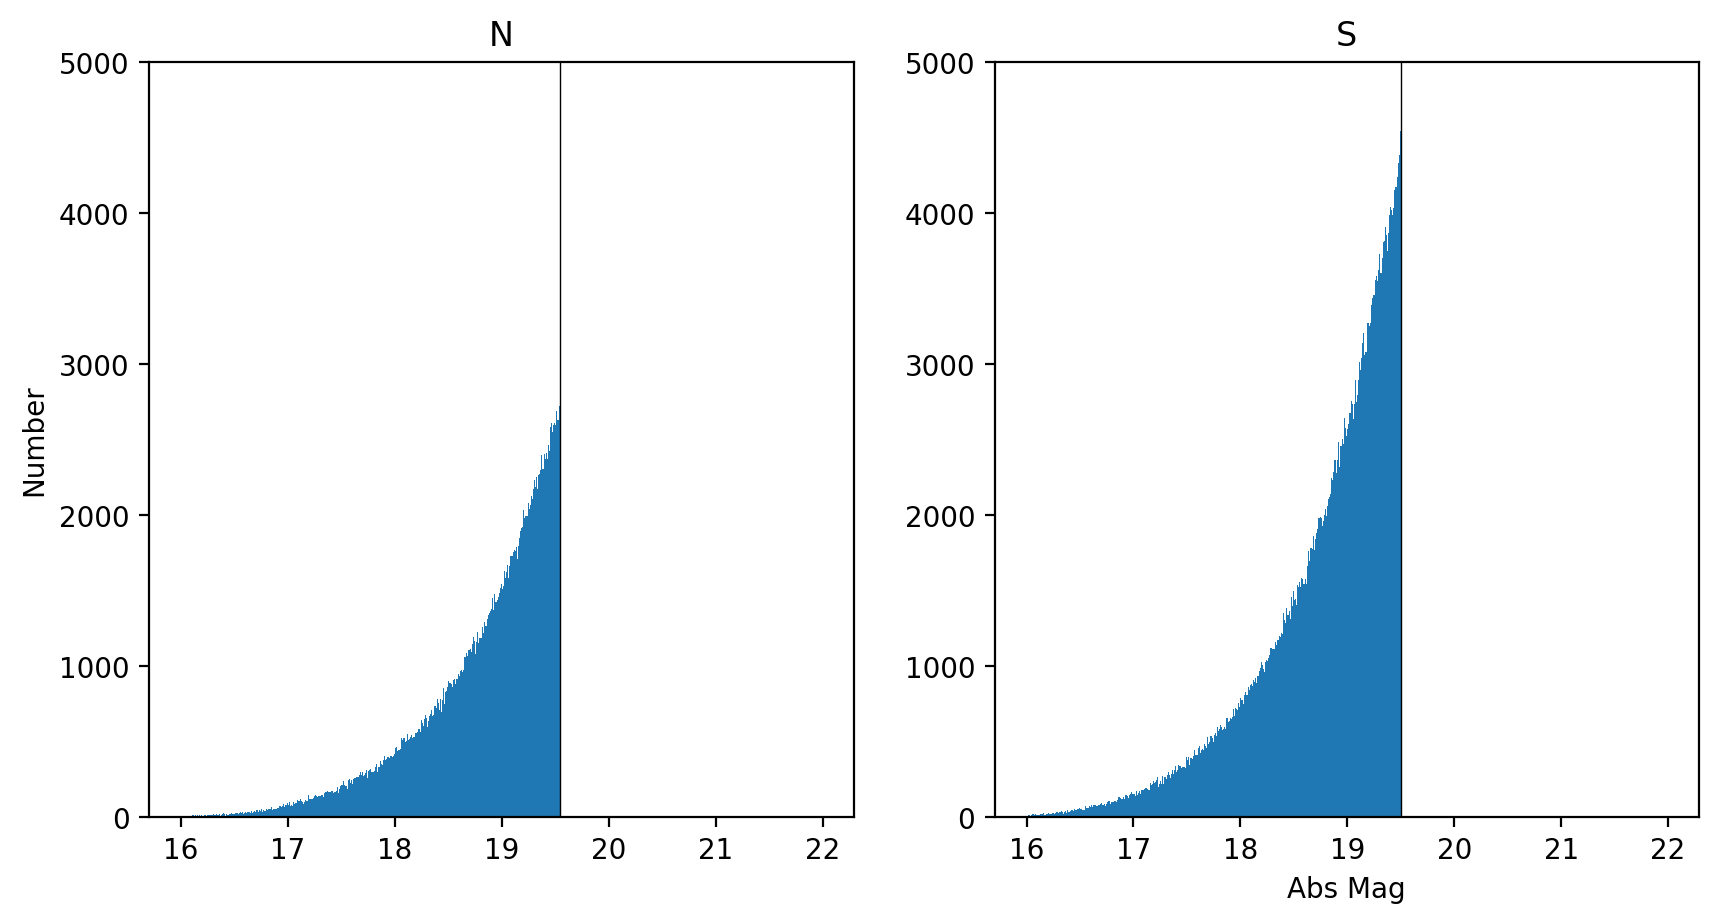

In [12]:
plt.figure(figsize=(10,5), dpi=200)

plt.subplot(121)
plt.title('N')
plt.hist(N['r_mag'], bins=np.arange(16,22,0.01))
plt.plot([19.539993,19.539993],[0,5000], lw=0.5, color='k')
plt.ylim(0,5000)
plt.ylabel('Number')

plt.subplot(122)
plt.title('S')
plt.hist(S['r_mag'], bins=np.arange(16,22,0.01))
plt.plot([19.5,19.5],[0,5000], lw=0.5, color='k')
plt.ylim(0,5000)
plt.xlabel('Abs Mag')


plt.show()

In [13]:
print('N', np.amax(N['r_mag']))
print('S', np.amax(S['r_mag']))

N 19.539993
S 19.5


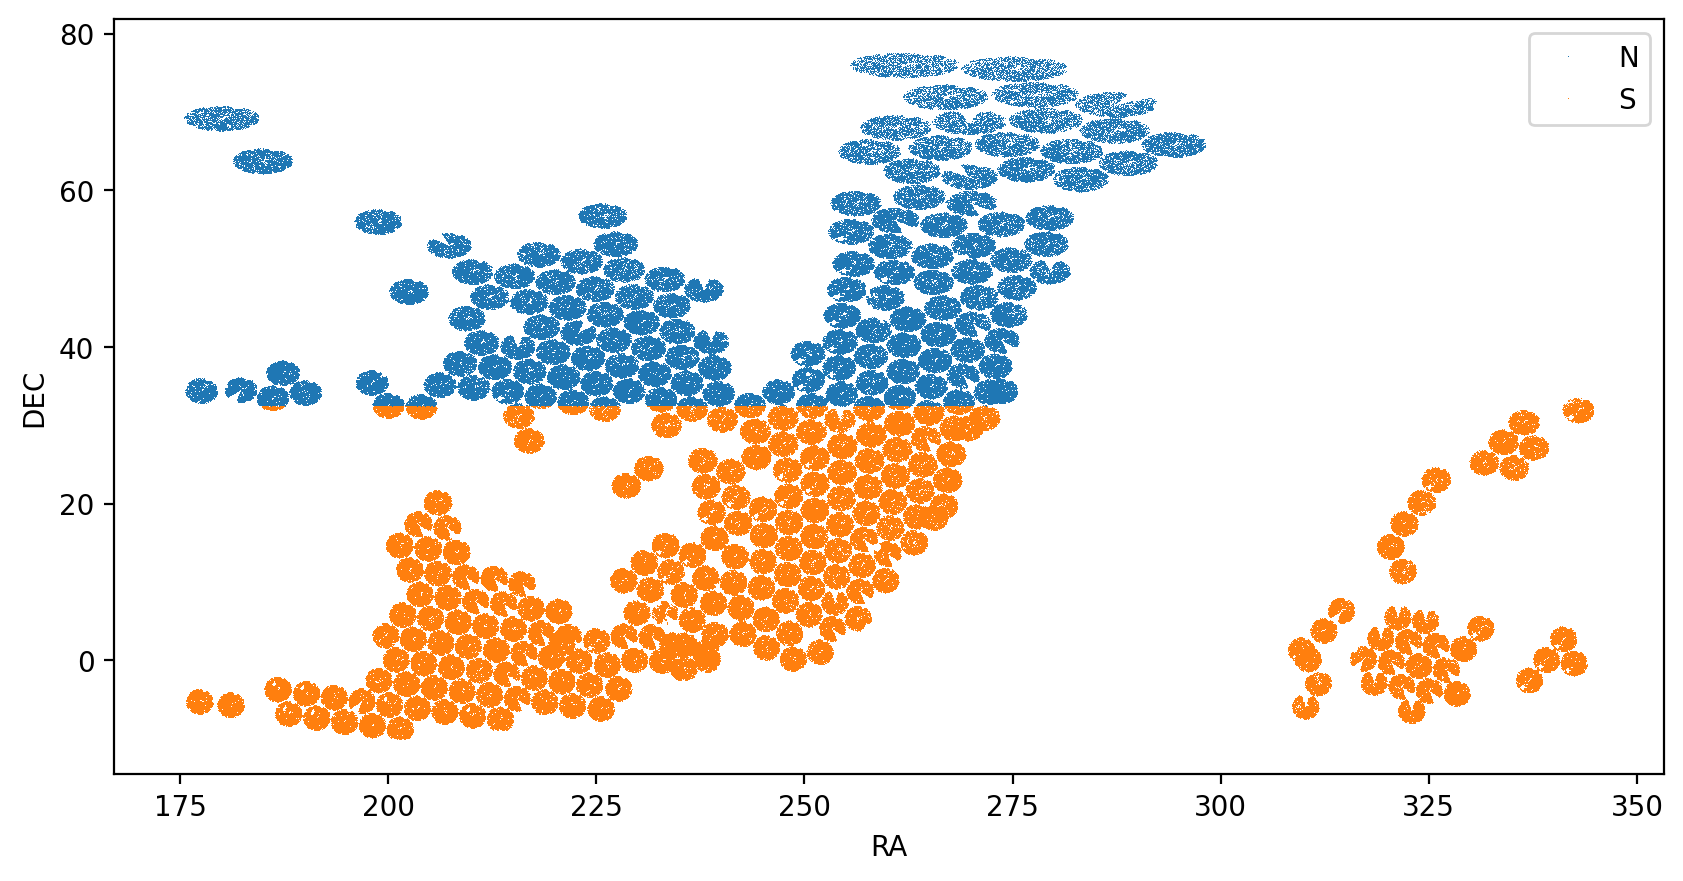

In [14]:
plt.figure(figsize=(10,5), dpi=200)
plt.plot(N_raw['RA'], N_raw['DEC'], lw=0, marker=',', label='N')
plt.plot(S_raw['RA'], S_raw['DEC'], lw=0, marker=',', label='S')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.legend()

plt.savefig('../figures/week6-7/DA02_sky_coverage2.png')

In [15]:
redshift_cut = np.where(data['Z'] <= 0.6)[0]
def zmax(m):
    return 10**(-(m+22.8)/5)

M_range = np.arange(-23,-12,0.1)
zmax_range = np.clip(zmax(M_range),a_min=None,a_max=0.6)

In [16]:
data[0]

TARGETID,Z,NTILE,TILES,RA,DEC,WEIGHT,WEIGHT_ZFAIL,WEIGHT_COMP,WEIGHT_SYS,flux_g_dered,flux_r_dered,flux_z_dered,flux_w1_dered,flux_w2_dered,NZ,WEIGHT_FKP,REST_GMR_0P1,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,EQ_ALL_0P0,EQ_ALL_0P1,ABSMAG_RP1,ABSMAG_RP0,APPLIM,ZLIM_UPPER,z_mag,w1_mag,g_mag,r_mag
int64,float64,int64,bytes11,float64,float64,float64,float32,float64,float64,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32
39633366047264297,0.16095951646742163,1,20001,268.7008850398322,58.31651750837625,2.368794267525197,1.0202607,2.0,1.1608769635685512,7.7169294,16.809292,28.698618,21.945616,12.552565,0.01856145426373512,0.016762400045732102,0.721548822097457,-0.0480892836645471,0.07562442170381622,0.17676402087349832,0.38471493423821956,0.637311614101099,-0.15613073097339897,-0.15613073097339897,-19.01505339080518,-19.239906695343226,19.539993,0.6,18.855347,19.146631,20.28139,19.436127


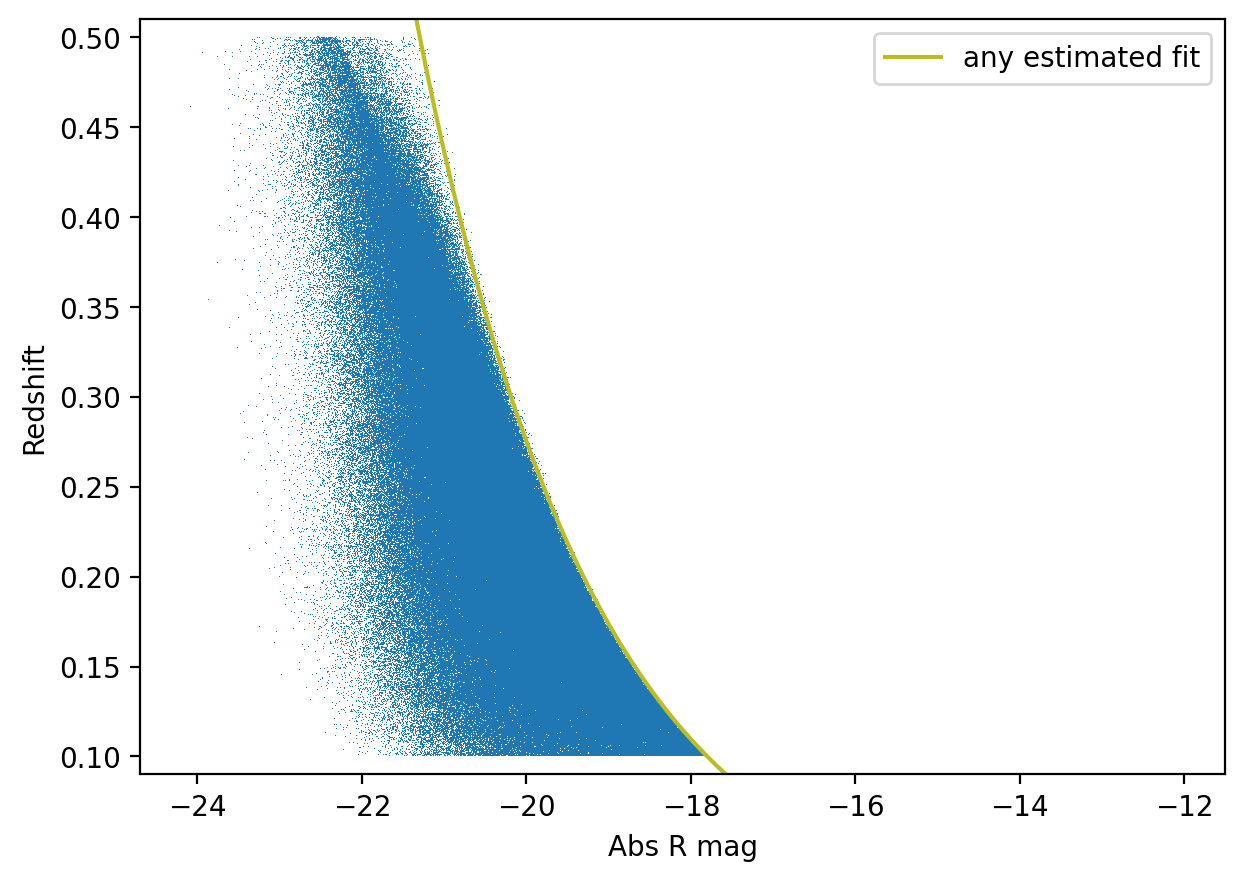

In [17]:
fig, ax1 = plt.subplots(figsize=(7,5),dpi=200)
ax1.plot(data['ABSMAG_RP1'][redshift_cut], data['Z'][redshift_cut], lw=0, marker=',')
#¢ax1.set_yscale('log')
ax1.plot(M_range, zmax_range, label='any estimated fit', color='tab:olive')
#ax1.scatter(data['ABSMAG_RP1P1'], zmax_clipped, color='tab:red', s=0.01)
plt.ylabel('Redshift')
plt.xlabel('Abs R mag')
plt.legend()
plt.ylim(0.09,0.51)
plt.show()

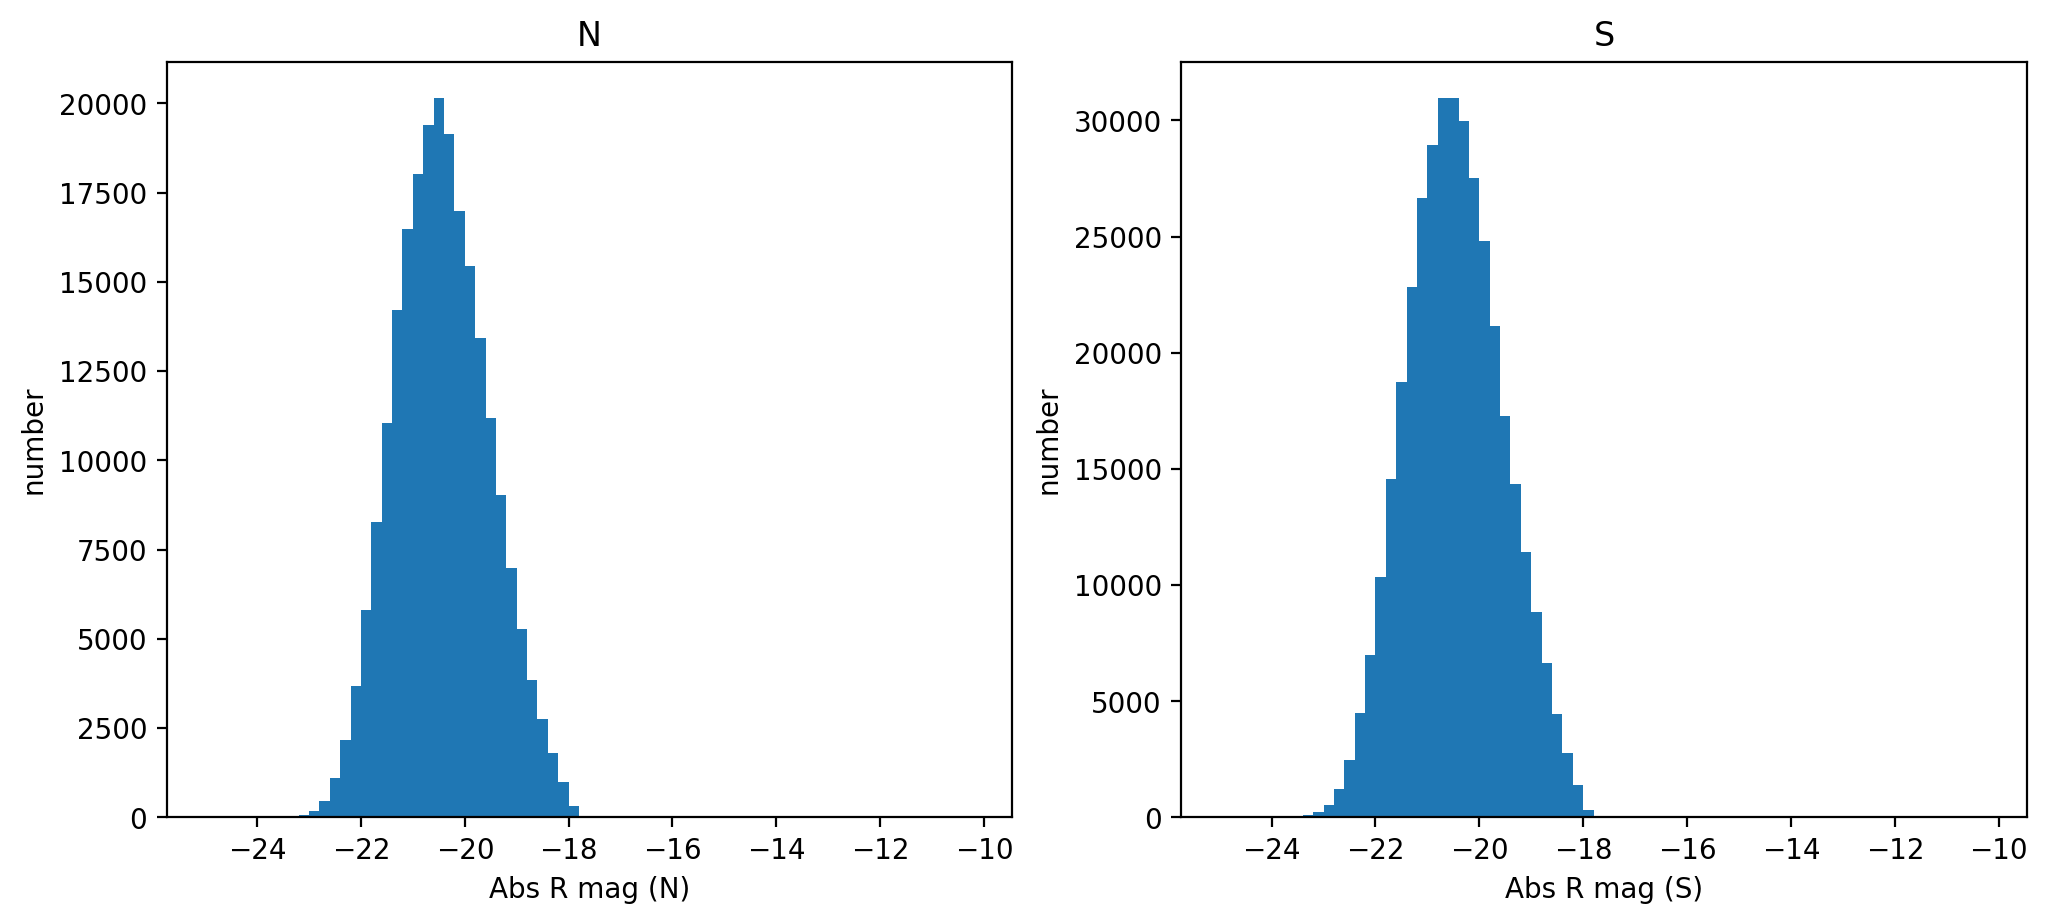

In [18]:
plt.figure(figsize=(12,5),dpi=200)
M_range = np.arange(-25,-10,0.2)
plt.subplot(121)
plt.title('N')
plt.hist(N['ABSMAG_RP1'], bins=M_range)
plt.xlabel('Abs R mag (N)')
plt.ylabel('number')

plt.subplot(122)
plt.title('S')
plt.hist(S['ABSMAG_RP1'], bins=M_range)
plt.xlabel('Abs R mag (S)')
plt.ylabel('number')

plt.savefig('../figures/week8/da02_abs_rmag_hist')

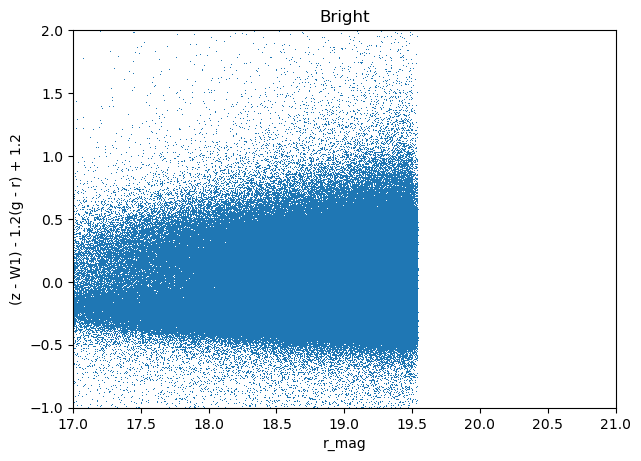

In [19]:
Y = (data['z_mag'] - data['w1_mag']) - 1.2*(data['g_mag'] - data['r_mag']) + 1.2
plt.figure(figsize=(7,5), dpi=100)
plt.title('Bright')
plt.plot(data['r_mag'], Y, lw=0, marker=',', color='tab:blue')
plt.plot(data['r_mag'], Y, lw=0, marker=',', color='tab:blue')
plt.ylim((-1,2))
plt.xlim((17,21))
plt.ylabel('(z - W1) - 1.2(g - r) + 1.2')
plt.xlabel('r_mag')
plt.savefig('../figures/week8/da02_Fig4.png')

#no faint

In [21]:
cosmo = FlatLambdaCDM(H0=100, Om0=0.3)
data['DL'] = cosmo.luminosity_distance(np.array(data['Z']))

In [22]:
data

TARGETID,Z,NTILE,TILES,RA,DEC,WEIGHT,WEIGHT_ZFAIL,WEIGHT_COMP,WEIGHT_SYS,flux_g_dered,flux_r_dered,flux_z_dered,flux_w1_dered,flux_w2_dered,NZ,WEIGHT_FKP,REST_GMR_0P1,KCORR_R0P1,KCORR_G0P1,KCORR_R0P0,KCORR_G0P0,REST_GMR_0P0,EQ_ALL_0P0,EQ_ALL_0P1,ABSMAG_RP1,ABSMAG_RP0,APPLIM,ZLIM_UPPER,z_mag,w1_mag,g_mag,r_mag,DL
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,Mpc
int64,float64,int64,bytes11,float64,float64,float64,float32,float64,float64,float32,float32,float32,float32,float32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float64
39633366047264297,0.16095951646742163,1,20001,268.7008850398322,58.31651750837625,2.368794267525197,1.0202607,2.0,1.1608769635685512,7.7169294,16.809292,28.698618,21.945616,12.552565,0.01856145426373512,0.016762400045732102,0.721548822097457,-0.0480892836645471,0.07562442170381622,0.17676402087349832,0.38471493423821956,0.637311614101099,-0.15613073097339897,-0.15613073097339897,-19.01505339080518,-19.239906695343226,19.539993,0.6,18.855347,19.146631,20.28139,19.436127,539.3514173803549
39633366047264412,0.2262081883049673,1,20001,268.7121644210125,58.17137871856034,7.885935437241774,1.0119702,7.0,1.1132365826456456,5.6451545,17.743734,36.715954,42.338474,30.138641,0.008661962234134126,0.03524444880947024,0.8916872718248806,0.055141909042679765,0.4068761917832286,0.28235492619244257,0.7782674152354703,0.7475090655224019,-0.21942194265581827,-0.21942194265581827,-19.934640009395764,-20.16185302654553,19.539993,0.6,18.587864,18.433163,20.62081,19.377388,787.7047657932226
39633366047264710,0.20509598282456507,1,20001,268.7447179685751,58.35164090788789,3.5493453409436366,1.0191563,3.0,1.1608769635685512,9.199382,18.115196,31.323214,38.144897,31.80481,0.011911149469520776,0.025879084952906813,0.5397214238839109,-0.06256931584764004,0.13341940431141774,0.14342391928728798,0.37673369579311694,0.5024003675371398,-0.19894310333982812,-0.19894310333982812,-19.621429255164735,-19.82742249029966,19.539993,0.6,18.760334,18.54641,20.090603,19.354893,705.617526120866
39633378638561503,0.3053206447975358,1,20001,270.5073482253405,59.33896919077583,2.3158908743540527,1.0118785,2.0,1.1443522597899662,5.816003,24.00663,49.666294,60.648766,39.263374,0.0032132398416806277,0.08965087986982612,0.948196974030458,0.1920467162085221,0.783116328481775,0.4201382412002311,1.1720507422145277,0.7873540852894143,-0.2961610254536097,-0.2961610254536097,-21.06440409622748,-21.29249562121919,19.539993,0.6,18.259846,18.042946,20.588438,19.049171,1109.1828398978914
39633372376467396,0.2775320962351793,1,20001,268.5121713053863,58.81550252397294,3.2715555825991145,1.0216688,3.0,1.067389487000734,4.9087415,18.647816,47.224636,121.78173,128.69661,0.006279602345083299,0.047974048180681544,0.9314978452803849,0.14147467853484277,0.6591231040064112,0.36796505192895507,1.0449898286507322,0.7721214940301759,-0.26920613334812393,-0.26920613334812393,-20.528724008118733,-20.755214381512847,19.539993,0.6,18.314579,17.286045,20.772575,19.32343,993.8393864610398
39633366047264487,0.10750217420934505,1,20001,268.72025843577376,58.150995263304566,3.3792646040688217,1.0118438,3.0,1.1132365826456456,65.581665,164.53503,310.0892,251.75818,156.65999,0.026715267796619462,0.011706208574030397,0.9793147837596916,-0.09317160654032018,-0.07379673881075391,0.1383131834916128,0.320207896877415,0.8167949381034556,-0.10427710898306469,-0.10427710898306469,-20.549183985528458,-20.78066877556039,19.539993,0.6,16.271284,16.497541,17.958044,16.959354,348.1204512009631
39633366047264069,0.23373774756268273,1,20001,268.6773406567538,58.196956322063585,5.65722136226266,1.0163556,5.0,1.1132365826456456,5.1988206,18.016794,36.307766,35.975773,23.484913,0.008661962234134126,0.03524444880947024,0.9539436956606155,0.08093321342091594,0.4764215093374489,0.30965139400867076,0.8662922728465651,0.7927911127392542,-0.22672561513580225,-0.22672561513580225,-20.049808198242104,-20.27852637882986,19.539

In [23]:
data['ABSMAG_LIM'] = data['APPLIM'] - 5*np.log10(data['DL'])-25-data['KCORR_R0P1']-data['EQ_ALL_0P1']

In [24]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

195603 0.14999975607170113
514764 0.4700007198589736
368346 0.3230006227475963


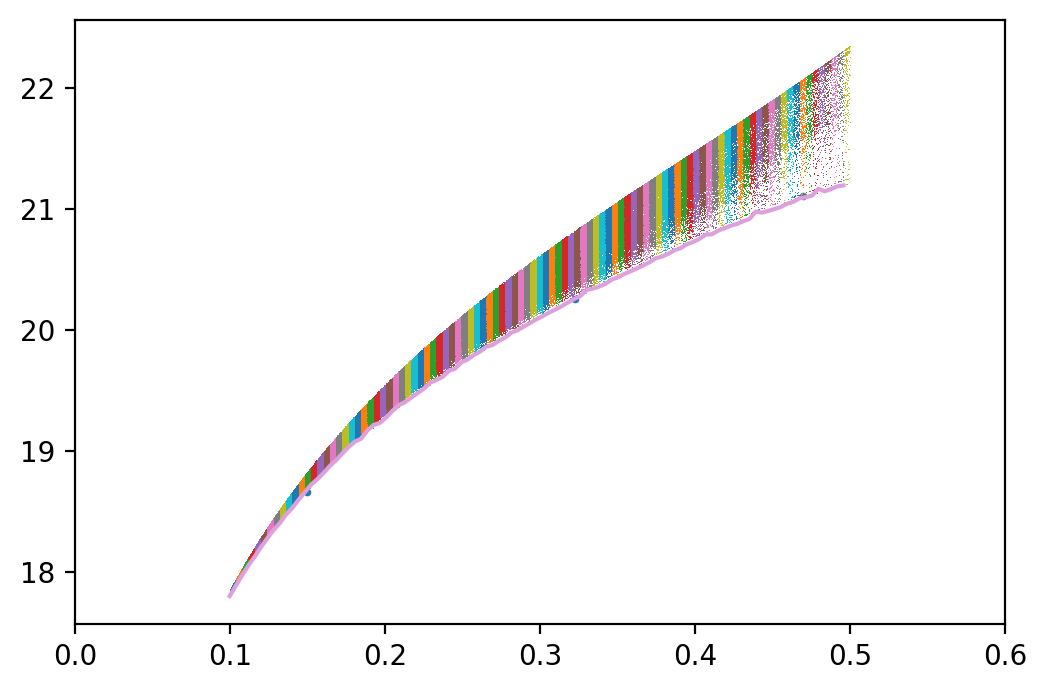

In [25]:
plt.figure(dpi=200)
def find_absmag_envelope(z_range):
    if isinstance(z_range, np.ndarray):
        a = np.empty(len(z_range)-1)
        for i, z in enumerate(z_range):
            if i == len(z_range)-1:
                break
            z_close = np.where(np.logical_and(data['Z'] > (z), data['Z'] < (z_range[i+1])))[0]

            #plt.plot([zmid,zmid], [17,22])
            plt.plot(data['Z'][z_close], -data['ABSMAG_LIM'][z_close], lw=0, marker=',')

            try:
                absmag_min = np.amax(np.array(data['ABSMAG_LIM'][z_close]))
            except:
                absmag_min = np.nan
            a[i] = absmag_min
            #plt.scatter(z, -absmag_min, s=10)
        return a
    elif isinstance(z_range, float):
        z = z_range
        z_closest = find_nearest(data['Z'], z)
        print(z_closest, data['Z'][z_closest])
        z_close = np.where(np.logical_and(data['Z'] > (z-0.001), data['Z'] < (z+0.001)))[0]
        try:
            absmag_min = np.amax(np.array(data['ABSMAG_LIM'][z_close]))
        except:
            absmag_min = np.nan
        return absmag_min

z_range = np.linspace(0.1,0.5,100)        
absmag_env = find_absmag_envelope(z_range) 
plt.plot(z_range[0:-1], -absmag_env, color='plum')
plt.scatter(np.array((0.15,0.47,0.323)),-np.array((find_absmag_envelope(0.15),find_absmag_envelope(0.47),find_absmag_envelope(0.323))), s=3)
plt.xlim(0,0.6)
plt.show()

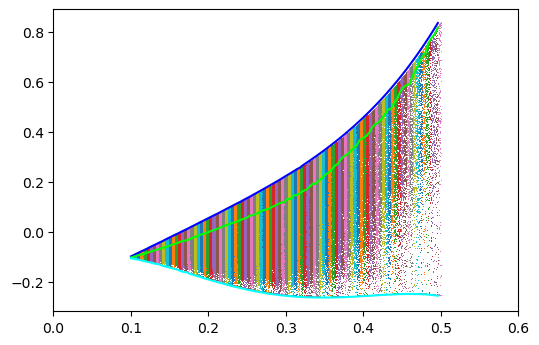

In [26]:
plt.figure(dpi=100)
def find_k(z_range, stat):
    if isinstance(z_range, np.ndarray):
        k = np.empty(len(z_range)-1)
        for i, z in enumerate(z_range):
            if i == len(z_range)-1:
                break
            z_close = np.where(np.logical_and(data['Z'] > (z), data['Z'] < (z_range[i+1])))[0]
            plt.plot(data['Z'][z_close], data['KCORR_R0P1'][z_close], lw=0, marker=',')
            if stat == 'med':
                k[i] = np.median(data['KCORR_R0P1'][z_close])
            elif stat == 'max':
                k[i] = np.amax(data['KCORR_R0P1'][z_close])
            elif stat == 'min':
                k[i] = np.amin(data['KCORR_R0P1'][z_close])
        return k


z_range = np.linspace(0.1,0.5,100)        
k_med = find_k(z_range, 'med') 
k_max = find_k(z_range, 'max')
k_min = find_k(z_range, 'min')
plt.plot(z_range[0:-1], k_max, color='blue')
plt.plot(z_range[0:-1], k_med, color='lime')
plt.plot(z_range[0:-1], k_min, color='aqua')

plt.xlim(0,0.6)
plt.show()

In [27]:
z1 = find_nearest(data['Z'], 0.2)
z2 = find_nearest(data['Z'], 0.4)
e_slope = (data['EQ_ALL_0P1'][z2] - data['EQ_ALL_0P1'][z1])/(data['Z'][z2] - data['Z'][z1])
print(data['Z'][z2], data['EQ_ALL_0P1'][z2])
print(data['Z'][z1], data['EQ_ALL_0P1'][z1])
print(e_slope)

e_intercept = data['EQ_ALL_0P1'][z2] - e_slope*data['Z'][z2]
print(e_intercept)
#y = mx+c

0.4000004507649722 -0.38800043724202304
0.1999998905457913 -0.19399989382941754
-0.9700000000000001
0.0


In [28]:
dl_range = cosmo.luminosity_distance(z_range[0:-1]).to_value()
e_z = e_slope*z_range[0:-1] + e_intercept
faintlim_range_N_max = 19.539993 - 5*np.log10(dl_range) - 25 - k_max - e_z
faintlim_range_S_max = 19.5  - 5*np.log10(dl_range) - 25 - k_max - e_z

faintlim_range_N_min = 19.539993 - 5*np.log10(dl_range) - 25 - k_min - e_z
faintlim_range_S_min = 19.5  - 5*np.log10(dl_range) - 25 - k_min - e_z

faintlim_range_N_med = 19.539993 - 5*np.log10(dl_range) - 25 - k_med - e_z
faintlim_range_S_med = 19.5  - 5*np.log10(dl_range) - 25 - k_med - e_z

brightlim_range_max = 15 - 5*np.log10(dl_range) - 25 - k_max - e_z
brightlim_range_min = 15 - 5*np.log10(dl_range) - 25 - k_min - e_z
brightlim_range_med = 15 - 5*np.log10(dl_range) - 25 - k_med - e_z

In [29]:
def absmag_lim(lim0, lim1, cat):
    return np.where(np.logical_and(cat['ABSMAG_RP1'] < lim0, cat['ABSMAG_RP1'] > lim1))

def redshift_lim(lim, cat):
    return np.where(cat['Z'] < np.minimum(zmax(lim),0.6))

def redshift_lim_bright(lim, cat):
    return np.where(cat['Z'] < np.minimum(zmax_bright(lim),0.6))

def redshift_lim_from_k(lim, cat):
    N_i = np.where(cat['APPLIM'] == 19.539993)
    S_i = np.where(cat['APPLIM'] == 19.5)
    cat['ZLIM_UPPER'][S_i] = z_range[find_nearest(faintlim_range_S_max,lim)]
    cat['ZLIM_UPPER'][N_i] = z_range[find_nearest(faintlim_range_N_max,lim)]

    upper_limed = np.where(cat['Z'] < np.minimum(cat['ZLIM_UPPER'],0.6))
    z_lim_lower = z_range[find_nearest(brightlim_range_min,lim)]
    return np.intersect1d(upper_limed, np.where(cat['Z'] > z_lim_lower))
    
M_range = np.arange(-23,-16,0.01)
zmax_range = zmax(M_range)
z17 = zmax(-18)
print(redshift_lim_from_k(-20, data))

[     0      1      2 ... 599196 599197 599198]


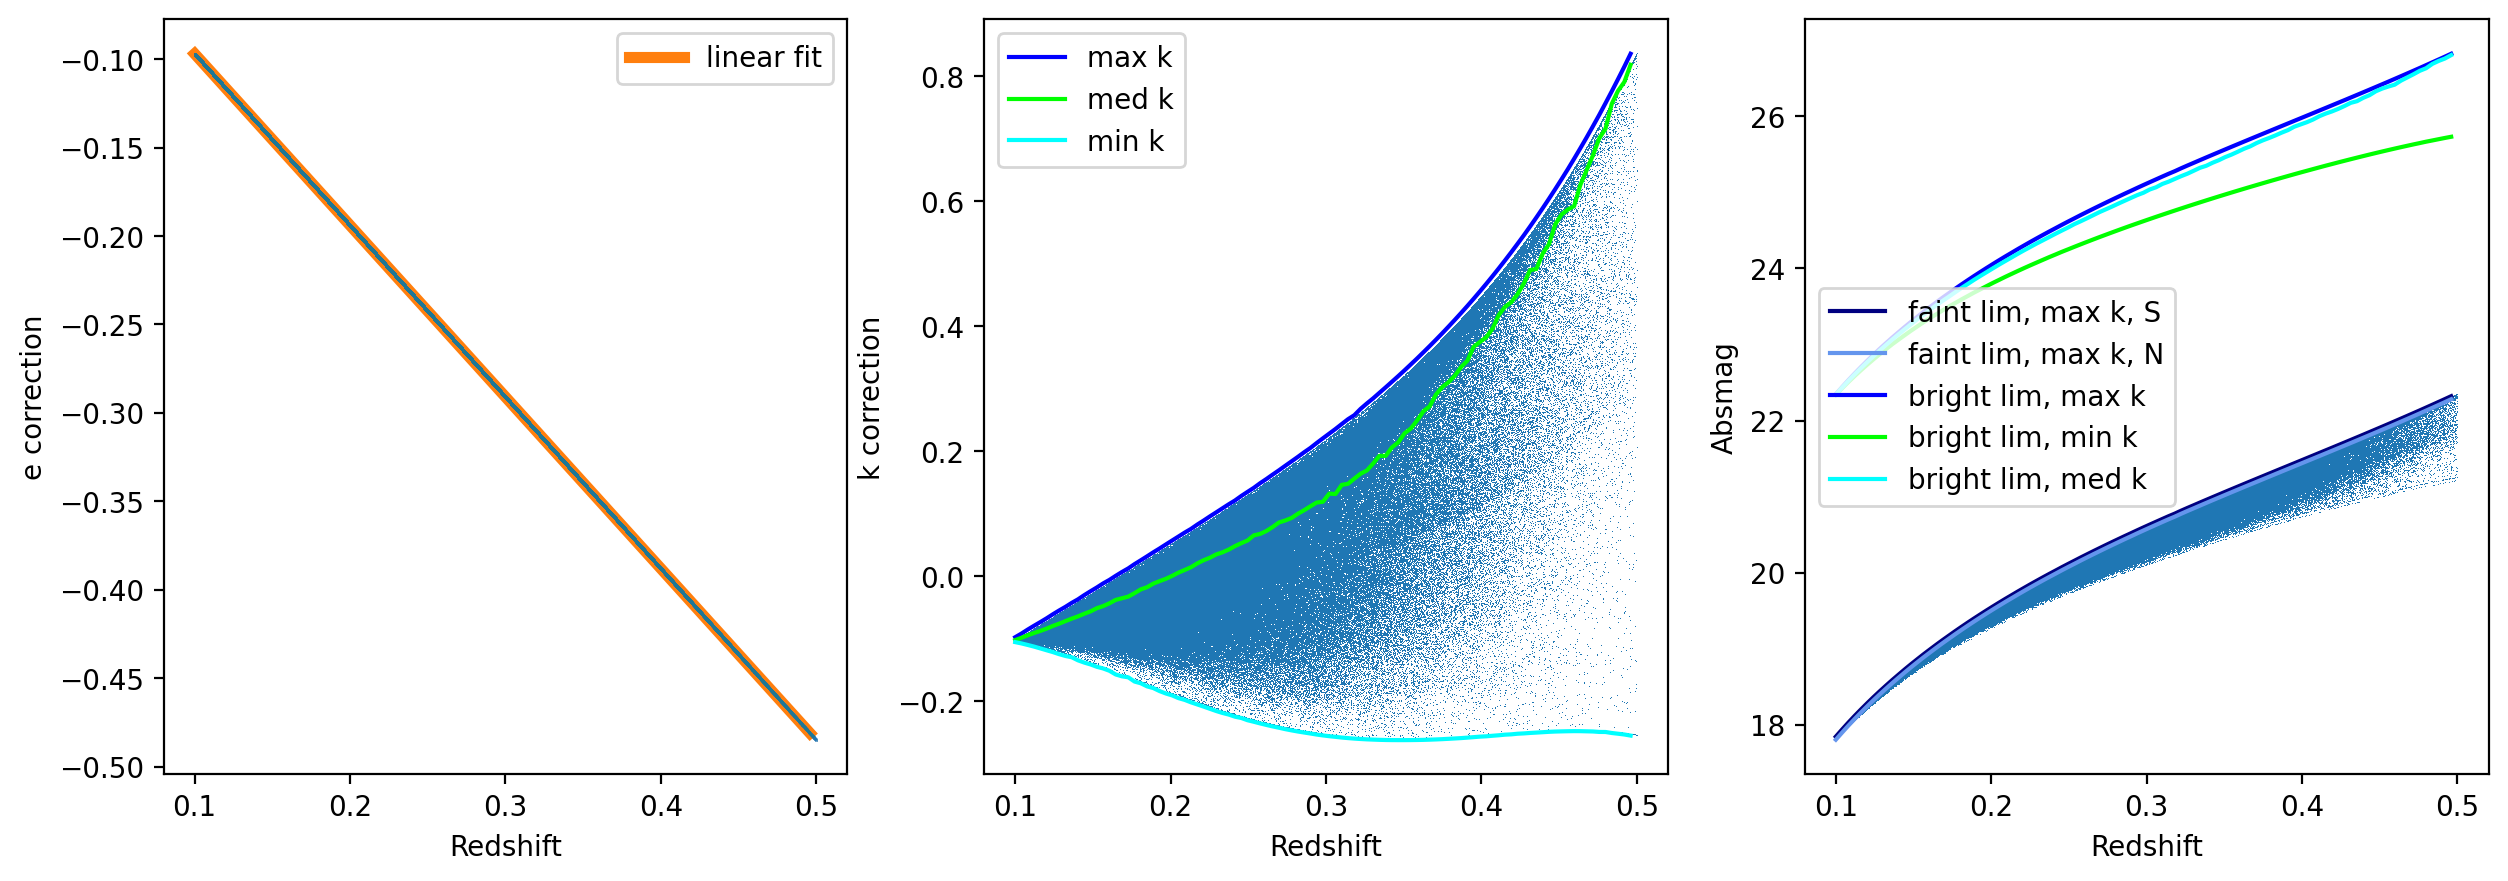

In [30]:
plt.figure(figsize=(15,5), dpi=200)

plt.subplot(131)
plt.plot(z_range[0:-1], e_z, label='linear fit', color='tab:orange', lw=4)
plt.plot(data['Z'], data['EQ_ALL_0P1'], lw=0, marker='o', color='tab:blue', markersize=0.01)
plt.legend()
plt.xlabel('Redshift')
plt.ylabel('e correction')

plt.subplot(132)
plt.plot(data['Z'], data['KCORR_R0P1'], lw=0, marker=',')
plt.plot(z_range[0:-1], k_max, color='blue', label='max k')
plt.plot(z_range[0:-1], k_med, color='lime', label='med k')
plt.plot(z_range[0:-1], k_min, color='aqua', label='min k')
plt.legend()
plt.xlabel('Redshift')
plt.ylabel('k correction')

plt.subplot(133)
plt.plot(data['Z'], -data['ABSMAG_LIM'], lw=0, marker=',')
plt.plot(z_range[0:-1], -faintlim_range_S_max, color='navy', label='faint lim, max k, S')
plt.plot(z_range[0:-1], -faintlim_range_N_max, color='cornflowerblue', label='faint lim, max k, N')
#plt.plot(z_range[0:-1], -faintlim_range_S_med, color='lime', label='med k, S')
#plt.plot(z_range[0:-1], -faintlim_range_N_med, color='palegreen', label='med k, N')
#plt.plot(z_range[0:-1], -faintlim_range_S_min, color='aqua', label='min k, S')
#plt.plot(z_range[0:-1], -faintlim_range_N_min, color='darkturquoise', label='min k, N')
plt.plot(z_range[0:-1], -brightlim_range_max, color='blue', label='bright lim, max k')
plt.plot(z_range[0:-1], -brightlim_range_min, color='lime', label='bright lim, min k')
plt.plot(z_range[0:-1], -brightlim_range_med, color='aqua', label='bright lim, med k')

plt.legend()
plt.xlabel('Redshift')
plt.ylabel('Absmag')
plt.savefig('../figures/week8/da02_corrections_and_absmag.png')


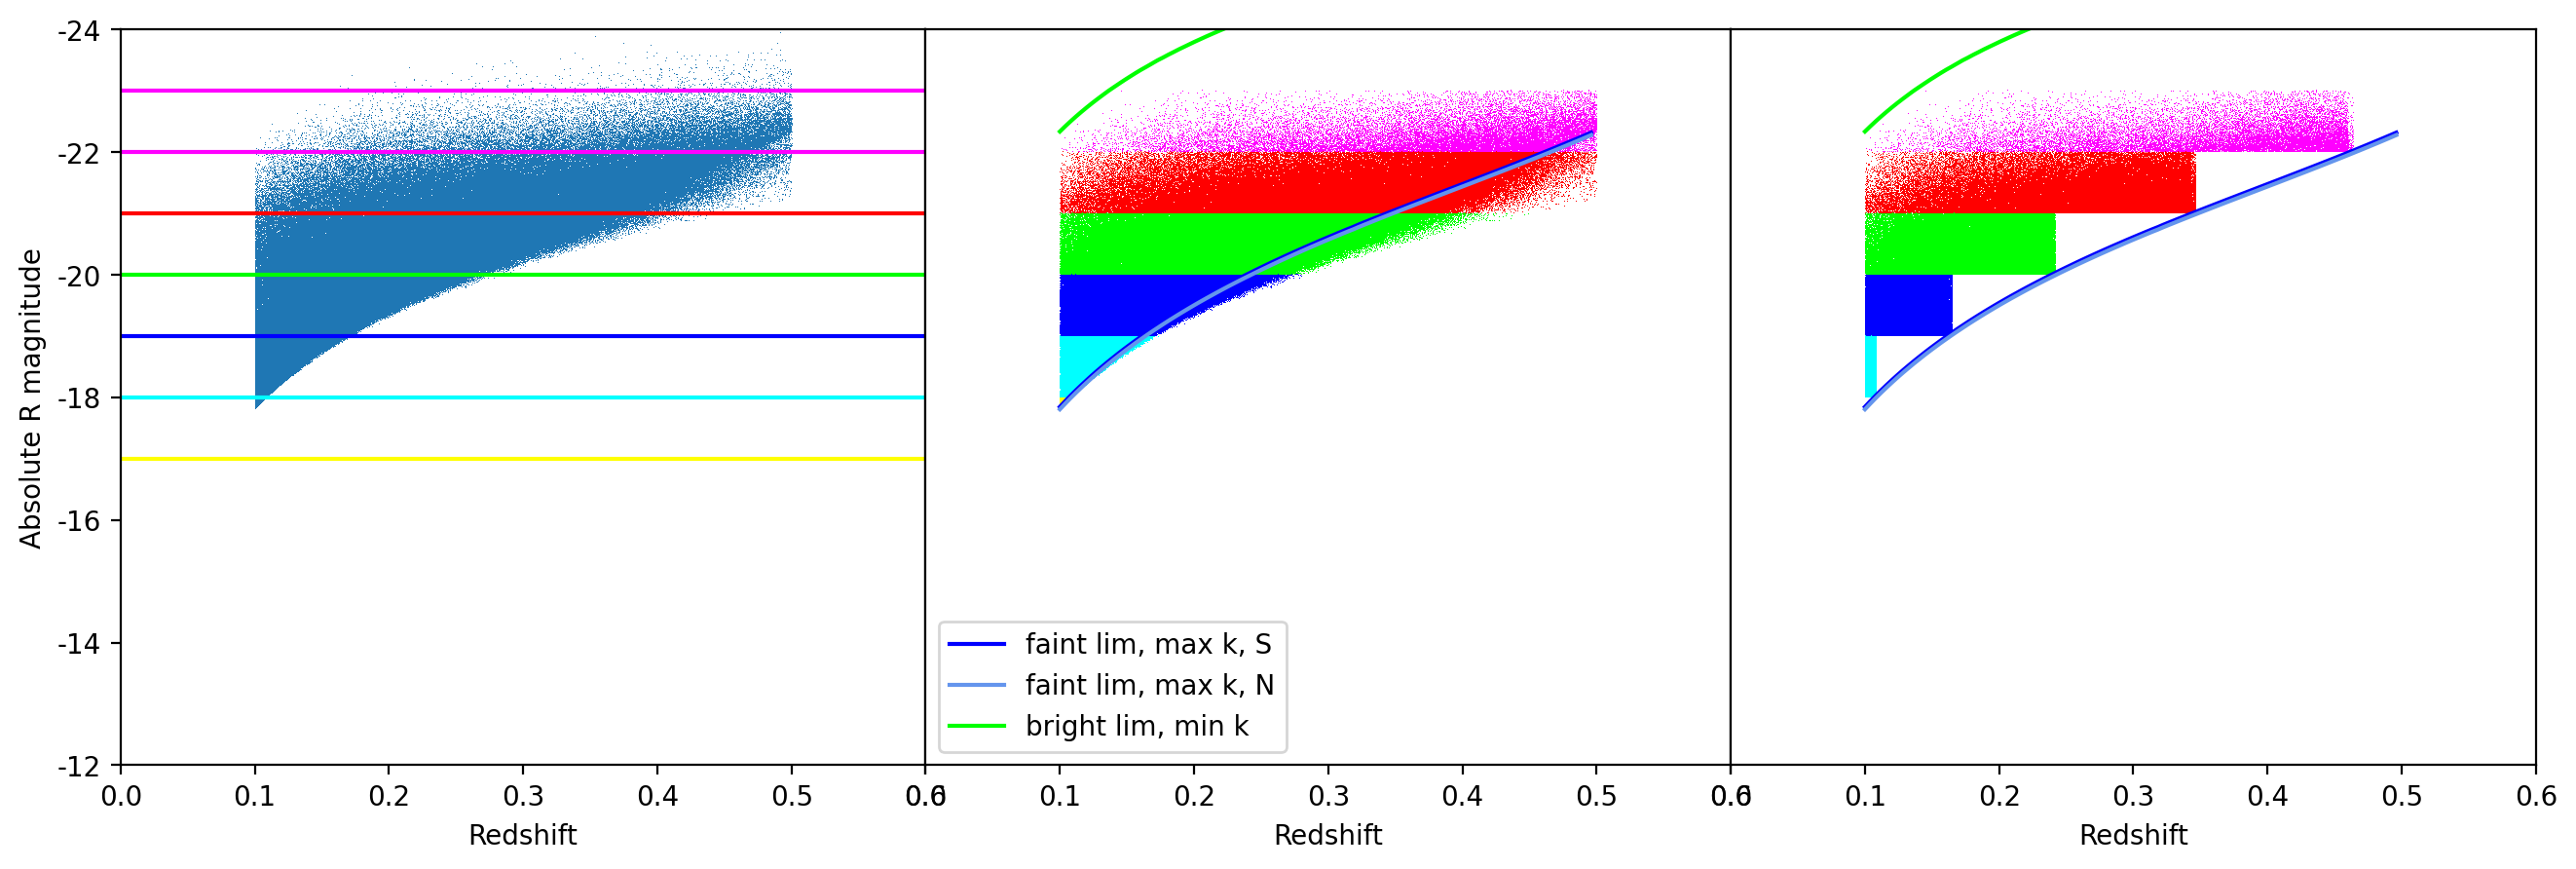

In [31]:
plt.figure(figsize=(16,5), dpi=200)
ax1 = plt.subplot(131)
ax1.plot(data['Z'], -data['ABSMAG_RP1'], lw=0, marker=',')
ax1.plot([0,0.6],[17,17], color='yellow')
ax1.plot([0,0.6],[18,18], color='cyan')
ax1.plot([0,0.6],[19,19], color='blue')
ax1.plot([0,0.6],[20,20], color='lime')
ax1.plot([0,0.6],[21,21], color='red')
ax1.plot([0,0.6],[22,22], color='magenta')
ax1.plot([0,0.6],[23,23], color='magenta')
plt.ylim(12,24)
plt.xlim(0,0.6)
plt.yticks([12,14,16,18,20,22,24],['-12','-14','-16','-18','-20','-22','-24'])
plt.xlabel('Redshift')
plt.ylabel('Absolute R magnitude')

ax2 = plt.subplot(132)
ax2.plot(data['Z'][absmag_lim(-17,-18, data)], -data['ABSMAG_RP1'][absmag_lim(-17,-18, data)], lw=0, marker=',', color='yellow')
ax2.plot(data['Z'][absmag_lim(-18,-19, data)], -data['ABSMAG_RP1'][absmag_lim(-18,-19, data)], lw=0, marker=',', color='cyan')
ax2.plot(data['Z'][absmag_lim(-19,-20, data)], -data['ABSMAG_RP1'][absmag_lim(-19,-20, data)], lw=0, marker=',', color='blue')
ax2.plot(data['Z'][absmag_lim(-20,-21, data)], -data['ABSMAG_RP1'][absmag_lim(-20,-21, data)], lw=0, marker=',', color='lime')
ax2.plot(data['Z'][absmag_lim(-21,-22, data)], -data['ABSMAG_RP1'][absmag_lim(-21,-22, data)], lw=0, marker=',', color='red')
ax2.plot(data['Z'][absmag_lim(-22,-23, data)], -data['ABSMAG_RP1'][absmag_lim(-22,-23, data)], lw=0, marker=',', color='magenta')
#ax2.plot(zmax_range, -M_range, color='tab:blue', lw=1, label='my estimate')
ax2.plot(z_range[0:-1], -faintlim_range_S_max, color='blue', label='faint lim, max k, S')
ax2.plot(z_range[0:-1], -faintlim_range_N_max, color='cornflowerblue', label='faint lim, max k, N')
#plt.plot(z_range[0:-1], -faintlim_range_S_med, color='lime', label='med k, S')

#plt.plot(z_range[0:-1], -faintlim_range_S_min, color='aqua', label='min k, S')
#plt.plot(z_range[0:-1], -brightlim_range_max, color='blue', label='bright lim, max k')
ax2.plot(z_range[0:-1], -brightlim_range_min, color='lime', label='bright lim, min k')
#plt.plot(z_range[0:-1], -brightlim_range_med, color='aqua', label='bright lim, med k')



plt.legend()
plt.yticks([])
plt.ylim(12,24)
plt.xlim(0,0.6)
plt.xlabel('Redshift')

ax3 = plt.subplot(133)
ax3.plot(data['Z'][np.intersect1d(absmag_lim(-17,-18, data), redshift_lim_from_k(-17, data))], -data['ABSMAG_RP1'][np.intersect1d(absmag_lim(-17,-18, data), redshift_lim_from_k(-17, data))], lw=0, marker=',', color='yellow')
ax3.plot(data['Z'][np.intersect1d(absmag_lim(-18,-19, data), redshift_lim_from_k(-18, data))], -data['ABSMAG_RP1'][np.intersect1d(absmag_lim(-18,-19, data), redshift_lim_from_k(-18, data))], lw=0, marker=',', color='cyan')
ax3.plot(data['Z'][np.intersect1d(absmag_lim(-19,-20, data), redshift_lim_from_k(-19, data))], -data['ABSMAG_RP1'][np.intersect1d(absmag_lim(-19,-20, data), redshift_lim_from_k(-19, data))], lw=0, marker=',', color='blue')
ax3.plot(data['Z'][np.intersect1d(absmag_lim(-20,-21, data), redshift_lim_from_k(-20, data))], -data['ABSMAG_RP1'][np.intersect1d(absmag_lim(-20,-21, data), redshift_lim_from_k(-20, data))], lw=0, marker=',', color='lime')
ax3.plot(data['Z'][np.intersect1d(absmag_lim(-21,-22, data), redshift_lim_from_k(-21, data))], -data['ABSMAG_RP1'][np.intersect1d(absmag_lim(-21,-22, data), redshift_lim_from_k(-21, data))], lw=0, marker=',', color='red')
ax3.plot(data['Z'][np.intersect1d(absmag_lim(-22,-23, data), redshift_lim_from_k(-22, data))], -data['ABSMAG_RP1'][np.intersect1d(absmag_lim(-22,-23, data), redshift_lim_from_k(-22, data))], lw=0, marker=',', color='magenta')
ax3.plot(z_range[0:-1], -faintlim_range_S_max, color='blue', label='faint lim, max k, S')
ax3.plot(z_range[0:-1], -faintlim_range_N_max, color='cornflowerblue', label='faint lim, max k, N')
ax3.plot(z_range[0:-1], -brightlim_range_min, color='lime', label='bright lim, min k')
plt.yticks([])
plt.ylim(12,24)
plt.xlim(0,0.6)

plt.xlabel('Redshift')
plt.subplots_adjust(wspace=0)
plt.savefig('../figures/week8/DA02_mag_v_redshift.png')


Text(0.5, 1.0, 'S')

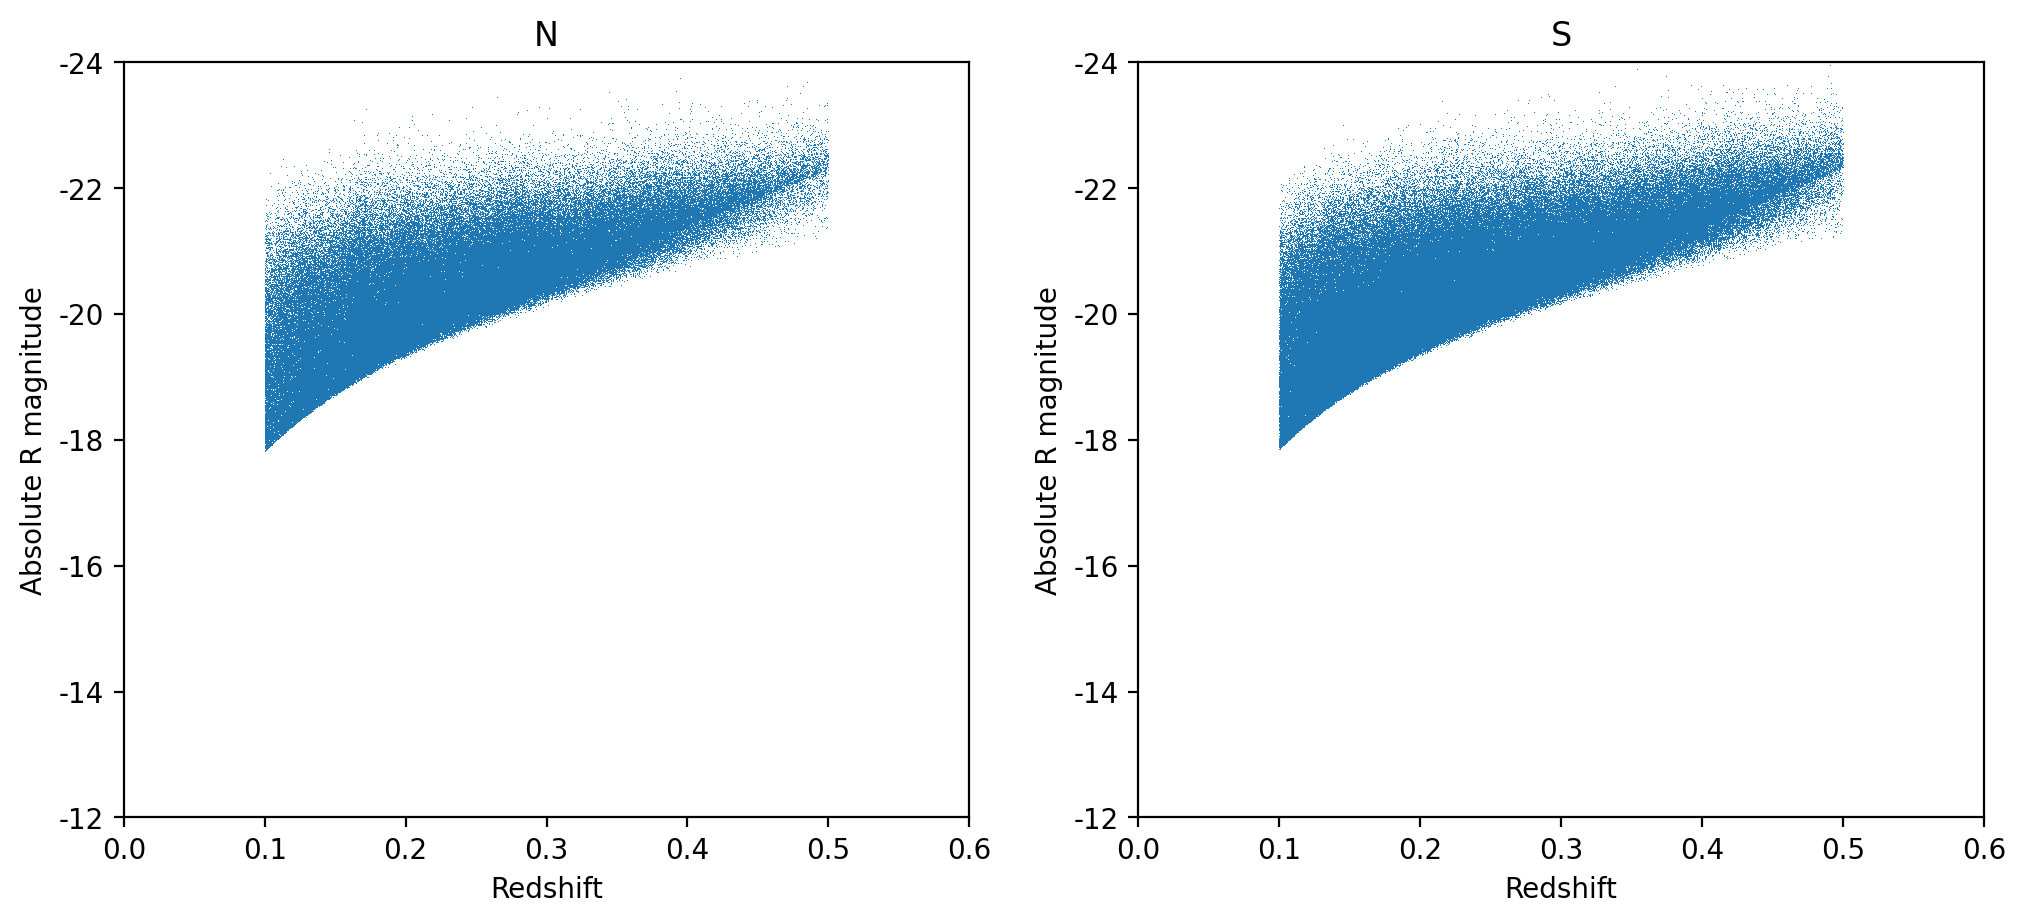

In [32]:
plt.figure(figsize=(12,5), dpi=200)

ax1 = plt.subplot(121)
ax1.plot(N['Z'], -N['ABSMAG_RP1'], lw=0, marker=',')
plt.ylim(12,24)
plt.xlim(0,0.6)
plt.yticks([12,14,16,18,20,22,24],['-12','-14','-16','-18','-20','-22','-24'])
plt.xlabel('Redshift')
plt.ylabel('Absolute R magnitude')
plt.title('N')

ax2 = plt.subplot(122)
ax2.plot(S['Z'], -S['ABSMAG_RP1'], lw=0, marker=',')
plt.ylim(12,24)
plt.xlim(0,0.6)
plt.yticks([12,14,16,18,20,22,24],['-12','-14','-16','-18','-20','-22','-24'])
plt.xlabel('Redshift')
plt.ylabel('Absolute R magnitude')
plt.title('S')


'WEIGHT',
 'WEIGHT_ZFAIL',
 'WEIGHT_COMP',
 'WEIGHT_SYS',
 'WEIGHT_FKP',

In [ ]:
plt.figure(figsize=(16,10),dpi=150)
ax1 = plt.subplot(231)
ax1.plot(data['Z'], data['WEIGHT'], lw=0, marker='o', markersize=1)
plt.xlabel('Redshift')
plt.ylabel('Weight')
plt.ylim(0,70)

ax4 = plt.subplot(234)
ax4.plot(data['Z'], data['WEIGHT'], lw=0, marker=',')
plt.xlabel('Redshift')
plt.ylabel('Weight')
plt.ylim(0,5)

ax2 = plt.subplot(232)
ax2.plot(data['Z'], data['WEIGHT_ZFAIL'], lw=0, marker='o', markersize=1)
plt.xlabel('Redshift')
plt.ylabel('Zfail Weight')
plt.ylim(0.995,1.029)

ax3 = plt.subplot(233)
ax3.plot(N['Z'], N['WEIGHT_FKP'], lw=0, marker='o', markersize=1)
ax3.plot(S['Z'], S['WEIGHT_FKP'], lw=0, marker='o', markersize=1)
plt.xlabel('Redshift')
plt.ylabel('FKP Weight')
plt.ylim(0,1)

ax5 = plt.subplot(235)
ax5.plot(data['Z'], data['WEIGHT_COMP'], lw=0, marker='o', markersize=1)
plt.xlabel('Redshift')
plt.ylabel('Completeness Weight')

ax6 = plt.subplot(236)
ax6.plot(data['Z'], data['WEIGHT_SYS'], lw=0, marker='o', markersize=1)
plt.xlabel('Redshift')
plt.ylabel('Sys Weight')

plt.savefig('../figures/week8/da02_weights.png')

#https://desi.lbl.gov/trac/wiki/ClusteringWG/LSScat/DA02main/current_version#Weights
#WEIGHT = WEIGHT_SYS*WEIGHT_COMP*WEIGHT_ZFAIL

In [ ]:
plt.figure(figsize=(12,5), dpi=200)

ax1 = plt.subplot(121)
ax1.hist(data['WEIGHT_COMP'], np.arange(0,70,0.5), label='comp')
ax1.hist(data['WEIGHT_SYS'], np.arange(0,70,0.5), label='sys')
ax1.hist(data['WEIGHT_ZFAIL'], np.arange(0,70,0.5), label='zfail')
ax1.set_yscale('log')
plt.xlabel('Weight')
plt.ylabel('Number')
plt.ylim(0.5,10**6)
plt.xlim(0,70)
plt.legend()

ax2 = plt.subplot(122)
ax2.hist(data['WEIGHT'], np.arange(0,70,0.5))
ax2.set_yscale('log')
plt.xlabel('Weight')
plt.ylabel('Number')
plt.text(15,400,'WEIGHT = WEIGHT_SYS*WEIGHT_COMP*WEIGHT_ZFAIL', size=8)
plt.ylim(0.5,10**6)
plt.xlim(0,70)

plt.savefig('../figures/week8/da02_weight_hist.png')

In [ ]:
data[0:10]

In [ ]:
N4[-1]

In [ ]:
target_location = np.empty(10)
for i in range(0,10):
    t = N0['TARGETID'][i]
    print(t)
    #target_location[i] = np.where(N['TARGETID'] == t)[0]
print(target_location)

In [ ]:
print(np.where(data['TARGETID'] == 327863306729553955)[0])